In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('data/Warehouse_and_Retail_Sales.csv')

In [3]:
df.sample(5)

,YEAR,MONTH,SUPPLIER,ITEM CODE,ITEM DESCRIPTION,ITEM TYPE,RETAIL SALES,RETAIL TRANSFERS,WAREHOUSE SALES
206738,2019,4,E & J GALLO WINERY,84640,DON MIGUEL GASCON COLOSSAL RED - 750ML,WINE,0.48,0.0,0.0
152726,2018,2,DIONYSOS IMPORTS INC,44978,DR FRANKS RKATSITELI - 750ML,WINE,0.16,0.0,0.0
97232,2017,10,JIM BEAM BRANDS CO,44114,YAMAZAKI S/M 12YR - 750ML,LIQUOR,4.75,5.0,5.0
304899,2020,9,LEGENDS LTD,64255,COLLECTIVE ARTS GOSE WITH GUAVA 6/4 CANS,BEER,0.00,0.0,1.0
221291,2019,6,REPUBLIC NATIONAL DISTRIBUTING CO,166501,RANCHO LA GLORIA RTD STRAWBERRY WINE COCKTAIL ...,WINE,0.00,0.0,7.0


# 1. Data Cleaning

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307645 entries, 0 to 307644
Data columns (total 9 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   YEAR              307645 non-null  int64  
 1   MONTH             307645 non-null  int64  
 2   SUPPLIER          307478 non-null  object 
 3   ITEM CODE         307645 non-null  object 
 4   ITEM DESCRIPTION  307645 non-null  object 
 5   ITEM TYPE         307644 non-null  object 
 6   RETAIL SALES      307642 non-null  float64
 7   RETAIL TRANSFERS  307645 non-null  float64
 8   WAREHOUSE SALES   307645 non-null  float64
dtypes: float64(3), int64(2), object(4)
memory usage: 21.1+ MB


In [5]:
null_columns = df.columns[df.isnull().any()].tolist()
null_columns

['SUPPLIER', 'ITEM TYPE', 'RETAIL SALES']

In [6]:
for col in null_columns:
    print(f'\n--- Column: {col} ---')
    print(f'Data type: {df[col].dtype}')
    print(f'Null count: {df[col].isnull().sum()}')
    print(f'Null percentage: {df[col].isnull().mean() * 100:.2f}%')

    if pd.api.types.is_numeric_dtype(df[col]):
        print(df[col].describe())

    elif pd.api.types.is_object_dtype(df[col]) or pd.api.types.is_string_dtype(df[col]):
        print(df[col].value_counts(dropna=True).head(5))
        print('Unique values (non-null):', df[col].nunique(dropna=True))

    else:
        print('Sample values:')
        print(df[col].dropna().unique()[:5])


--- Column: SUPPLIER ---
Data type: object
Null count: 167
Null percentage: 0.05%
SUPPLIER
REPUBLIC NATIONAL DISTRIBUTING CO       20995
LEGENDS LTD                             13634
SOUTHERN GLAZERS WINE AND SPIRITS       11720
E & J GALLO WINERY                      10816
THE COUNTRY VINTNER, LLC DBA WINEBOW    10669
Name: count, dtype: int64
Unique values (non-null): 396

--- Column: ITEM TYPE ---
Data type: object
Null count: 1
Null percentage: 0.00%
ITEM TYPE
WINE           187640
LIQUOR          64910
BEER            42413
KEGS            10146
NON-ALCOHOL      1908
Name: count, dtype: int64
Unique values (non-null): 8

--- Column: RETAIL SALES ---
Data type: float64
Null count: 3
Null percentage: 0.00%
count    307642.000000
mean          7.024071
std          30.986238
min          -6.490000
25%           0.000000
50%           0.320000
75%           3.267500
max        2739.000000
Name: RETAIL SALES, dtype: float64


In [7]:
df['SUPPLIER'] = df['SUPPLIER'].fillna('UNKNOWN')

In [8]:
df[df['ITEM TYPE'].isnull()]

,YEAR,MONTH,SUPPLIER,ITEM CODE,ITEM DESCRIPTION,ITEM TYPE,RETAIL SALES,RETAIL TRANSFERS,WAREHOUSE SALES
95532,2017,10,REPUBLIC NATIONAL DISTRIBUTING CO,347939,FONTANAFREDDA BAROLO SILVER LABEL 750 ML,NaN,0.0,0.0,1.0


In [9]:
df.loc[df['ITEM CODE'] == '347939', 'ITEM TYPE'] = 'WINE'

In [10]:
df[df['RETAIL SALES'].isnull()]

,YEAR,MONTH,SUPPLIER,ITEM CODE,ITEM DESCRIPTION,ITEM TYPE,RETAIL SALES,RETAIL TRANSFERS,WAREHOUSE SALES
18390,2020,7,UNKNOWN,4,RMS ITEM,NON-ALCOHOL,NaN,0.0,0.0
299080,2020,9,UNKNOWN,3,COUPON,NON-ALCOHOL,NaN,0.0,0.0
302917,2020,9,UNKNOWN,4,RMS ITEM,NON-ALCOHOL,NaN,0.0,0.0


In [11]:
df['RETAIL SALES'] = df['RETAIL SALES'].fillna(0)

# 2. Data Analysis

In [12]:
df['TOTAL SALES'] = df['RETAIL SALES'] + df['WAREHOUSE SALES']

In [13]:
df['DATE'] = pd.to_datetime(df['YEAR'].astype(str) + '-' + df['MONTH'].astype(str))

In [14]:
print('Min date:', df['DATE'].min())
print('Max date:', df['DATE'].max())

Min date: 2017-06-01 00:00:00
Max date: 2020-09-01 00:00:00


In [15]:
df['ITEM TYPE'].value_counts()

ITEM TYPE
WINE            187641
LIQUOR           64910
BEER             42413
KEGS             10146
NON-ALCOHOL       1908
STR_SUPPLIES       405
REF                127
DUNNAGE             95
Name: count, dtype: int64

In [16]:
df_alcohol = df[df['ITEM TYPE'].isin(['WINE', 'LIQUOR', 'BEER'])]

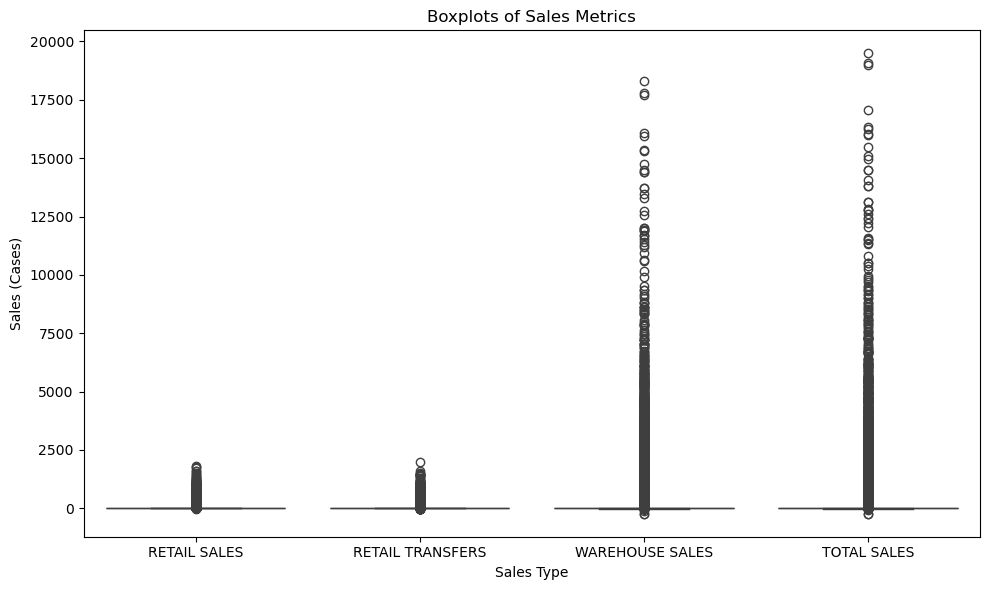

In [17]:
df_sales = df_alcohol[['RETAIL SALES', 'RETAIL TRANSFERS', 'WAREHOUSE SALES', 'TOTAL SALES']].melt(var_name='Sales Type', value_name='Sales')

plt.figure(figsize=(10, 6))
sns.boxplot(x='Sales Type', y='Sales', data=df_sales)

plt.title('Boxplots of Sales Metrics')
plt.xlabel('Sales Type')
plt.ylabel('Sales (Cases)')
plt.tight_layout()
plt.show()

In [18]:
df_alcohol.sort_values(by='TOTAL SALES', ascending=False).head(5)

,YEAR,MONTH,SUPPLIER,ITEM CODE,ITEM DESCRIPTION,ITEM TYPE,RETAIL SALES,RETAIL TRANSFERS,WAREHOUSE SALES,TOTAL SALES,DATE
13281,2020,7,CROWN IMPORTS,23445,CORONA EXTRA LOOSE NR - 12OZ,BEER,1174.0,1041.0,18317.00,19491.00,2020-07-01
209126,2019,5,CROWN IMPORTS,23445,CORONA EXTRA LOOSE NR - 12OZ,BEER,1373.0,1207.0,17703.62,19076.62,2019-05-01
234273,2019,7,CROWN IMPORTS,23445,CORONA EXTRA LOOSE NR - 12OZ,BEER,1198.0,1416.0,17810.87,19008.87,2019-07-01
104006,2017,11,CROWN IMPORTS,23445,CORONA EXTRA LOOSE NR - 12OZ,BEER,992.0,981.0,16079.12,17071.12,2017-11-01
63384,2017,8,CROWN IMPORTS,23445,CORONA EXTRA LOOSE NR - 12OZ,BEER,990.0,1077.0,15346.71,16336.71,2017-08-01


In [19]:
df_alcohol.sort_values(by='TOTAL SALES').head(5)

,YEAR,MONTH,SUPPLIER,ITEM CODE,ITEM DESCRIPTION,ITEM TYPE,RETAIL SALES,RETAIL TRANSFERS,WAREHOUSE SALES,TOTAL SALES,DATE
60510,2017,7,ANHEUSER BUSCH INC,84938,BUD SUMMER CAMO ALUMINUM BTL 16.0Z 3/8 PK,BEER,0.0,0.0,-229.33,-229.33,2017-07-01
49097,2017,7,ANHEUSER BUSCH INC,12870,MICHELOB ULTRA 160Z. ALUMIMUN GOLF 24 PK NR,BEER,0.0,0.0,-229.00,-229.00,2017-07-01
302651,2020,9,HEINEKEN USA,37015,HEINEKEN 0.0 1/15 MIX CAN,BEER,8.0,0.0,-99.00,-91.00,2020-09-01
49098,2017,7,ANHEUSER BUSCH INC,12871,BUD LIGHT LIME 24/16 CAL NR 3/8PK,BEER,0.0,0.0,-46.00,-46.00,2017-07-01
49099,2017,7,KATCEF BROTHERS INC,12872,DEVILS BACKBONE VIENNA LAGER 24PK 16.0Z CAN,BEER,0.0,0.0,-31.00,-31.00,2017-07-01


In [20]:
df_alcohol = df_alcohol.sort_values('DATE')

In [21]:
df_alcohol.to_csv('data_alcohol.csv', index=False) 

In [22]:
df_grouped_date = df_alcohol.groupby('DATE')[['TOTAL SALES', 'RETAIL SALES', 'WAREHOUSE SALES']].sum().reset_index()

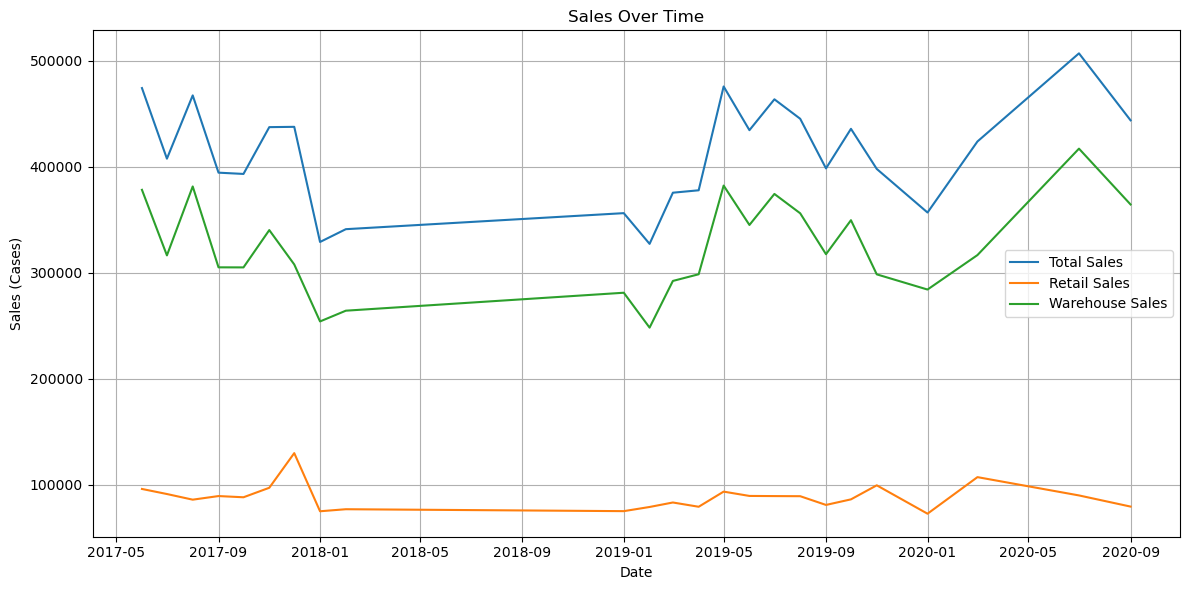

In [23]:
plt.figure(figsize=(12, 6))

plt.plot(df_grouped_date['DATE'], df_grouped_date['TOTAL SALES'], label='Total Sales')
plt.plot(df_grouped_date['DATE'], df_grouped_date['RETAIL SALES'], label='Retail Sales')
plt.plot(df_grouped_date['DATE'], df_grouped_date['WAREHOUSE SALES'], label='Warehouse Sales')

plt.title('Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Sales (Cases)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [24]:
df_grouped_year_month = df_alcohol.groupby(['YEAR', 'MONTH'])[['TOTAL SALES', 'RETAIL SALES', 'WAREHOUSE SALES']].sum().reset_index()

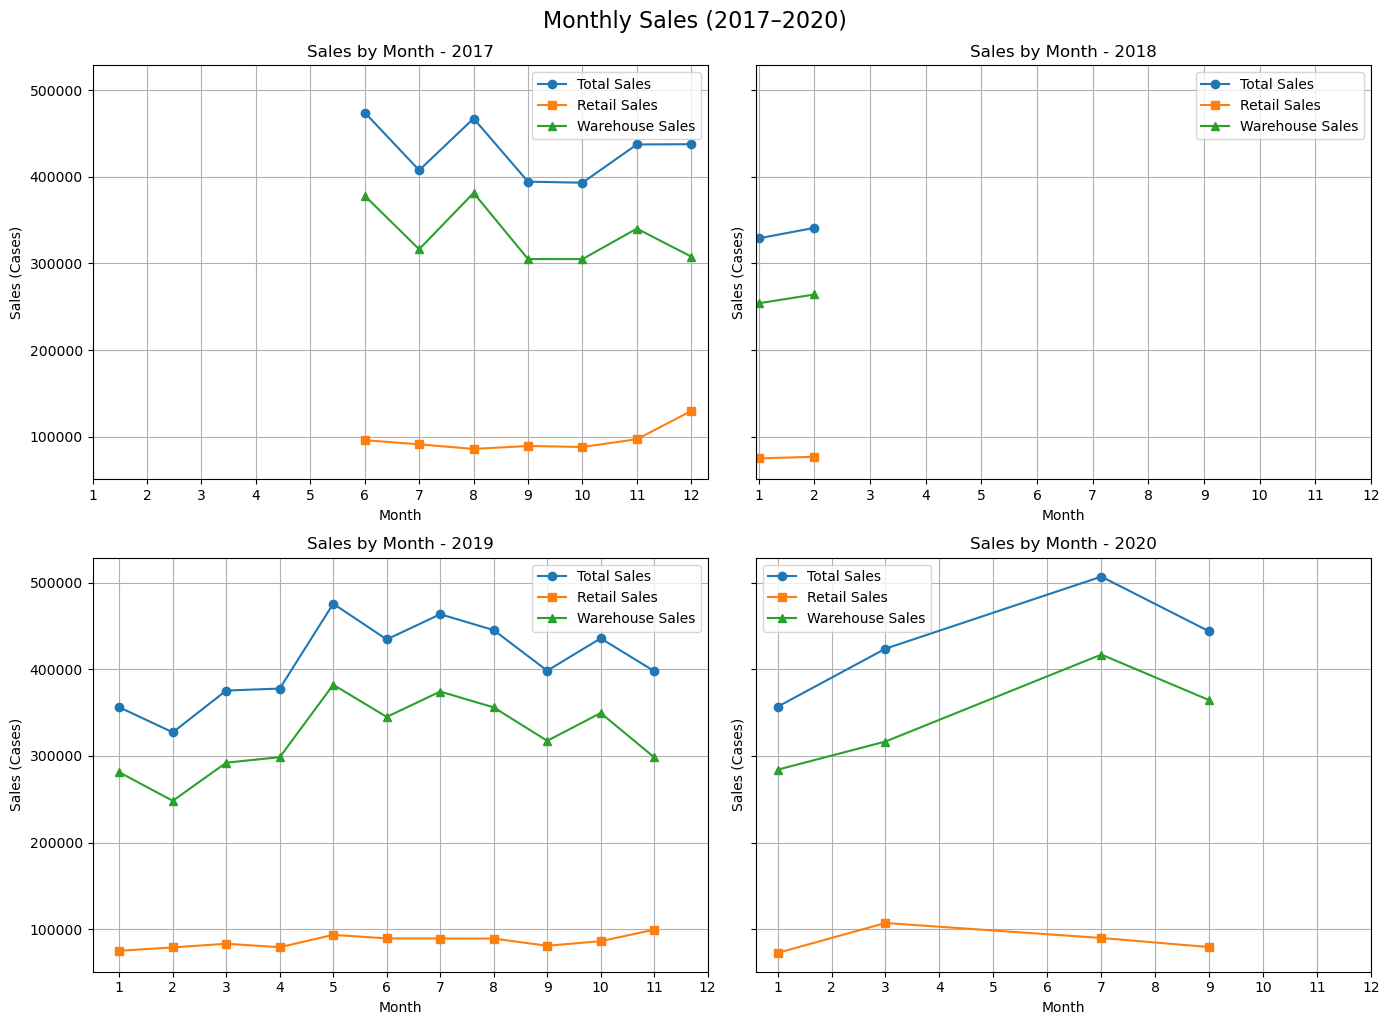

In [25]:
fig, axes = plt.subplots(2, 2, figsize=(14, 10), sharey=True)
axes = axes.flatten()

for i, year in enumerate(range(2017, 2021)):
    data_year = df_grouped_year_month[df_grouped_year_month['YEAR'] == year]
    
    axes[i].plot(data_year['MONTH'], data_year['TOTAL SALES'], label='Total Sales', marker='o')
    axes[i].plot(data_year['MONTH'], data_year['RETAIL SALES'], label='Retail Sales', marker='s')
    axes[i].plot(data_year['MONTH'], data_year['WAREHOUSE SALES'], label='Warehouse Sales', marker='^')
    
    axes[i].set_title(f'Sales by Month - {year}')
    axes[i].set_xlabel('Month')
    axes[i].set_ylabel('Sales (Cases)')
    axes[i].set_xticks(range(1, 13))
    axes[i].grid(True)
    axes[i].legend()

plt.tight_layout()
plt.suptitle('Monthly Sales (2017–2020)', fontsize=16, y=1.02)
plt.show()

In [26]:
df_grouped_supplier = (
    df_alcohol.groupby('SUPPLIER')['TOTAL SALES']
    .agg(['sum', 'mean'])
    .rename(columns={'sum': 'Total Sales', 'mean': 'Average Sales'})
    .sort_values(by='Total Sales', ascending=False)
    .reset_index()
)

In [27]:
top_10_suppliers = df_grouped_supplier.head(10)
bottom_10_suppliers = df_grouped_supplier.tail(10)

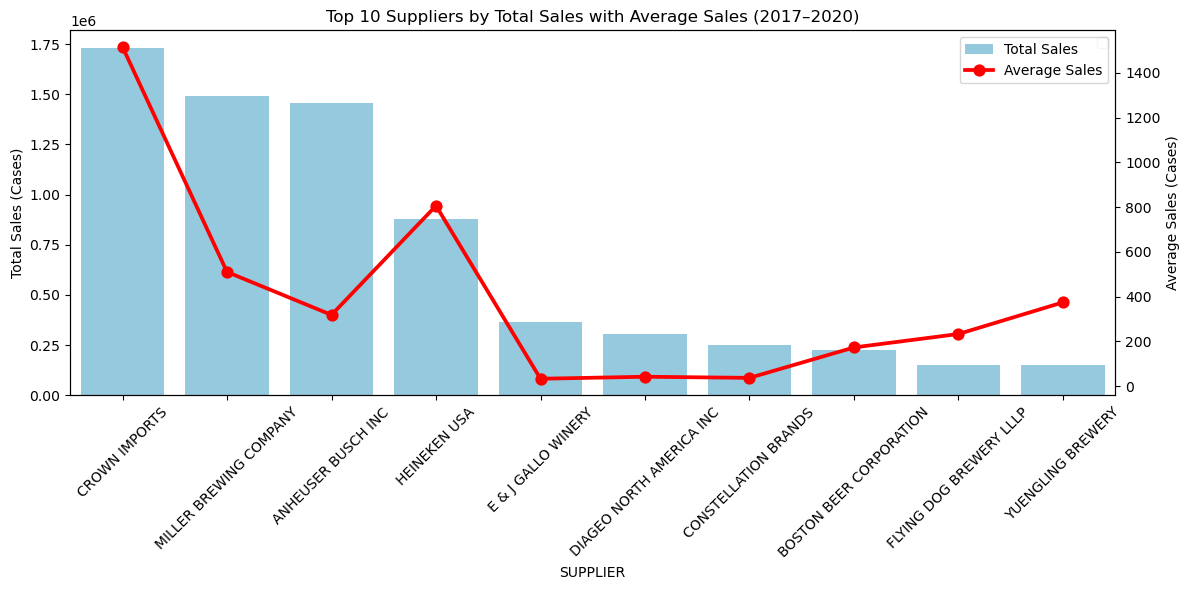

In [28]:
fig, ax1 = plt.subplots(figsize=(12, 6))

sns.barplot(data=top_10_suppliers, x='SUPPLIER', y='Total Sales', ax=ax1, color='skyblue', label='Total Sales')

ax2 = ax1.twinx()
sns.pointplot(data=top_10_suppliers, x='SUPPLIER', y='Average Sales', ax=ax2, color='red', label='Average Sales', markers='o')

ax1.tick_params(axis='x', labelrotation=45)
ax1.set_ylabel('Total Sales (Cases)')
ax2.set_ylabel('Average Sales (Cases)')
plt.title('Top 10 Suppliers by Total Sales with Average Sales (2017–2020)')

lines_1, labels_1 = ax1.get_legend_handles_labels()
lines_2, labels_2 = ax2.get_legend_handles_labels()
ax1.legend('')
ax2.legend(lines_1 + lines_2, labels_1 + labels_2, loc='upper right')

plt.tight_layout()
plt.show()

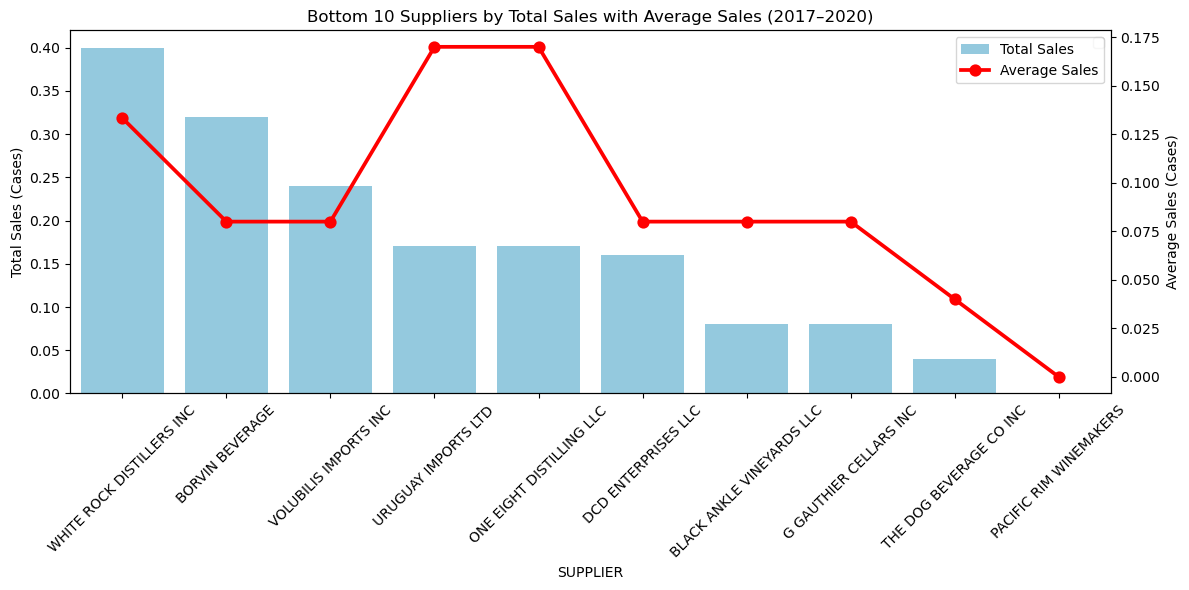

In [29]:
fig, ax1 = plt.subplots(figsize=(12, 6))

sns.barplot(data=bottom_10_suppliers, x='SUPPLIER', y='Total Sales', ax=ax1, color='skyblue', label='Total Sales')

ax2 = ax1.twinx()
sns.pointplot(data=bottom_10_suppliers, x='SUPPLIER', y='Average Sales', ax=ax2, color='red', label='Average Sales', markers='o')

ax1.tick_params(axis='x', labelrotation=45)
ax1.set_ylabel('Total Sales (Cases)')
ax2.set_ylabel('Average Sales (Cases)')
plt.title('Bottom 10 Suppliers by Total Sales with Average Sales (2017–2020)')

lines_1, labels_1 = ax1.get_legend_handles_labels()
lines_2, labels_2 = ax2.get_legend_handles_labels()
ax1.legend('')
ax2.legend(lines_1 + lines_2, labels_1 + labels_2, loc='upper right')

plt.tight_layout()
plt.show()

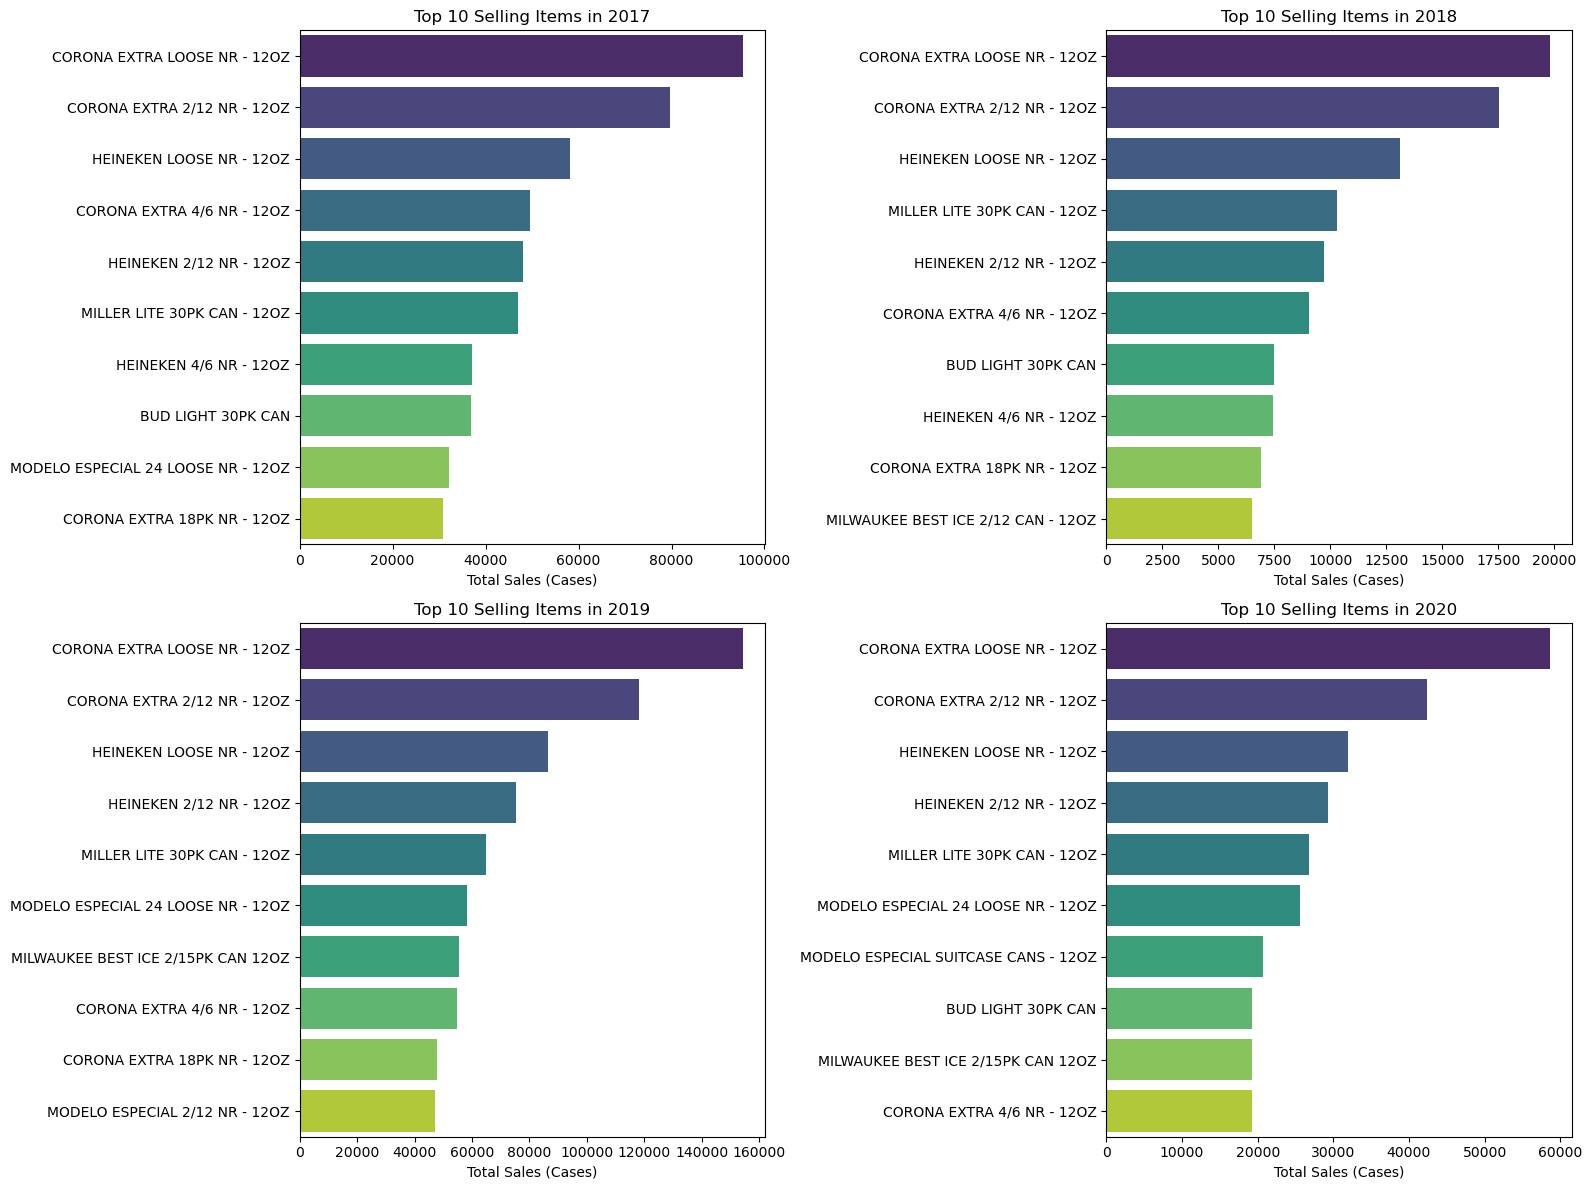

In [30]:
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
axes = axes.flatten()

for i, year in enumerate(range(2017, 2021)):
    top_items = (
        df_alcohol[df_alcohol['YEAR'] == year]
        .groupby('ITEM DESCRIPTION')['TOTAL SALES']
        .sum()
        .sort_values(ascending=False)
        .head(10)
    )
    
    sns.barplot(
        x=top_items.values,
        y=top_items.index,
        ax=axes[i],
        palette='viridis',
        hue=top_items.index
    )
    
    axes[i].set_title(f'Top 10 Selling Items in {year}')
    axes[i].set_xlabel('Total Sales (Cases)')
    axes[i].set_ylabel('')

plt.tight_layout()
plt.show()

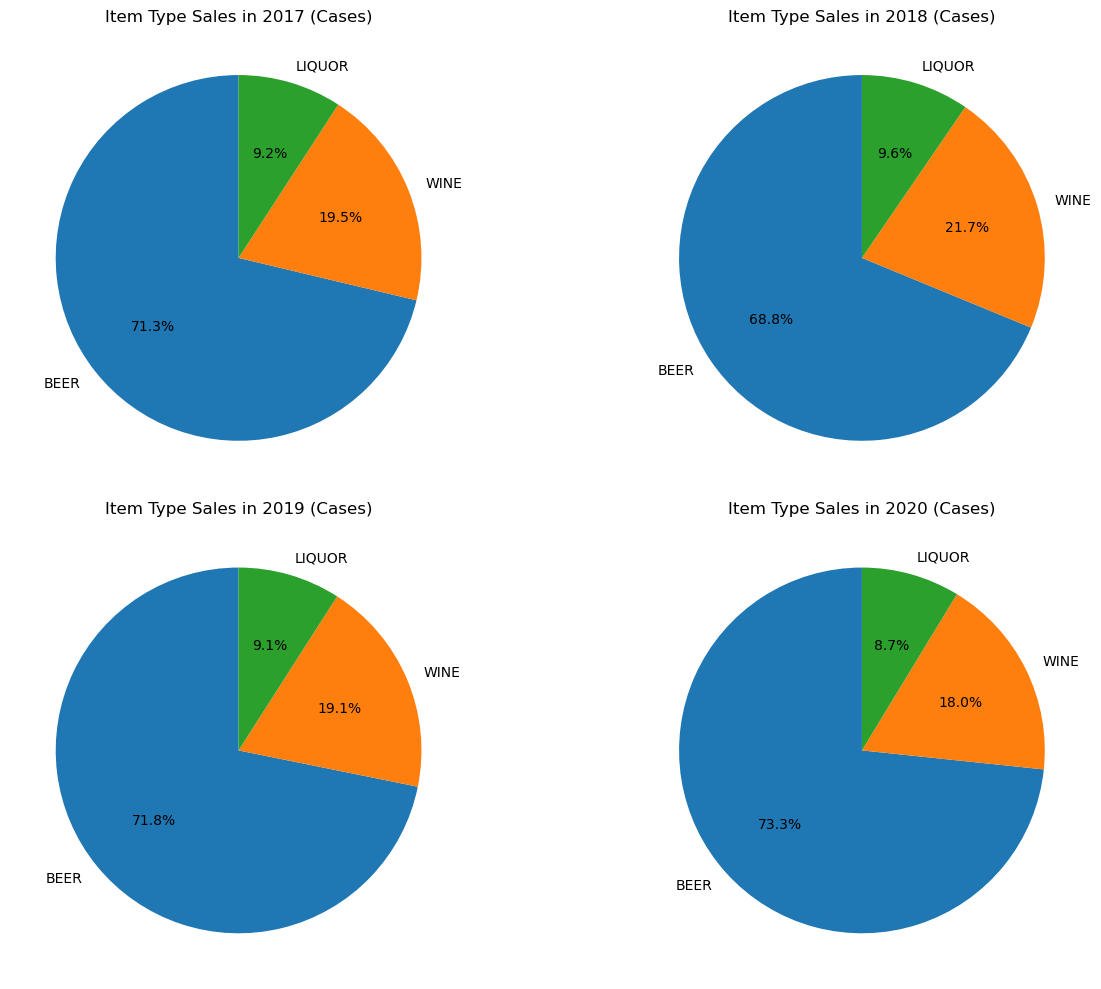

In [31]:
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.flatten()

for i, year in enumerate(range(2017, 2021)):
    data_year = df_alcohol[df_alcohol['YEAR'] == year]
    
    type_sales = (
        data_year.groupby('ITEM TYPE')['TOTAL SALES']
        .sum()
        .sort_values(ascending=False)
    )
    
    axes[i].pie(
        type_sales,
        labels=type_sales.index,
        autopct='%1.1f%%',
        startangle=90
    )
    
    axes[i].set_title(f'Item Type Sales in {year} (Cases)')

plt.tight_layout()
plt.show()

In [32]:
correlation = df['RETAIL TRANSFERS'].corr(df['WAREHOUSE SALES'])
print(f'Correlation between RETAIL TRANSFERS and WAREHOUSE SALES: {correlation:.4f}')

Correlation between RETAIL TRANSFERS and WAREHOUSE SALES: 0.4921


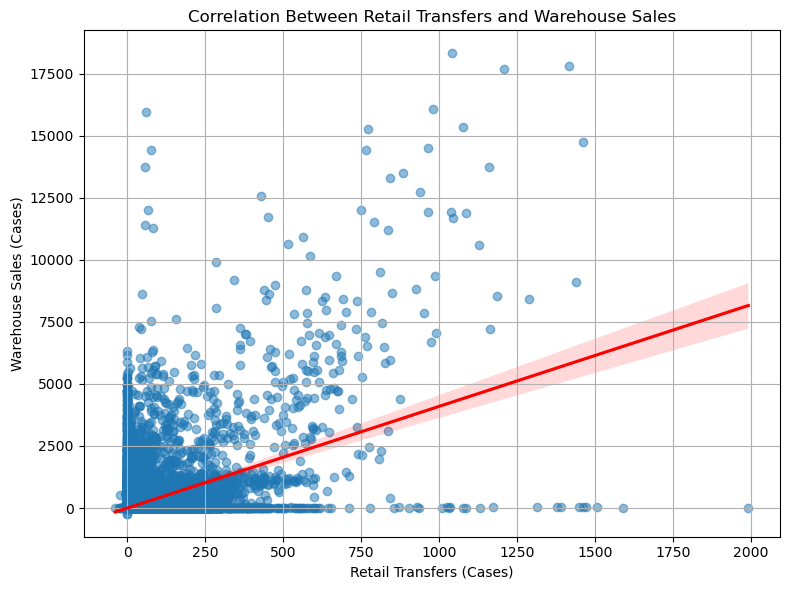

In [33]:
plt.figure(figsize=(8, 6))

sns.regplot(
    data=df_alcohol,
    x='RETAIL TRANSFERS',
    y='WAREHOUSE SALES',
    scatter_kws={'alpha': 0.5},
    line_kws={'color': 'red'}
)

plt.title('Correlation Between Retail Transfers and Warehouse Sales')
plt.xlabel('Retail Transfers (Cases)')
plt.ylabel('Warehouse Sales (Cases)')
plt.grid(True)
plt.tight_layout()
plt.show()

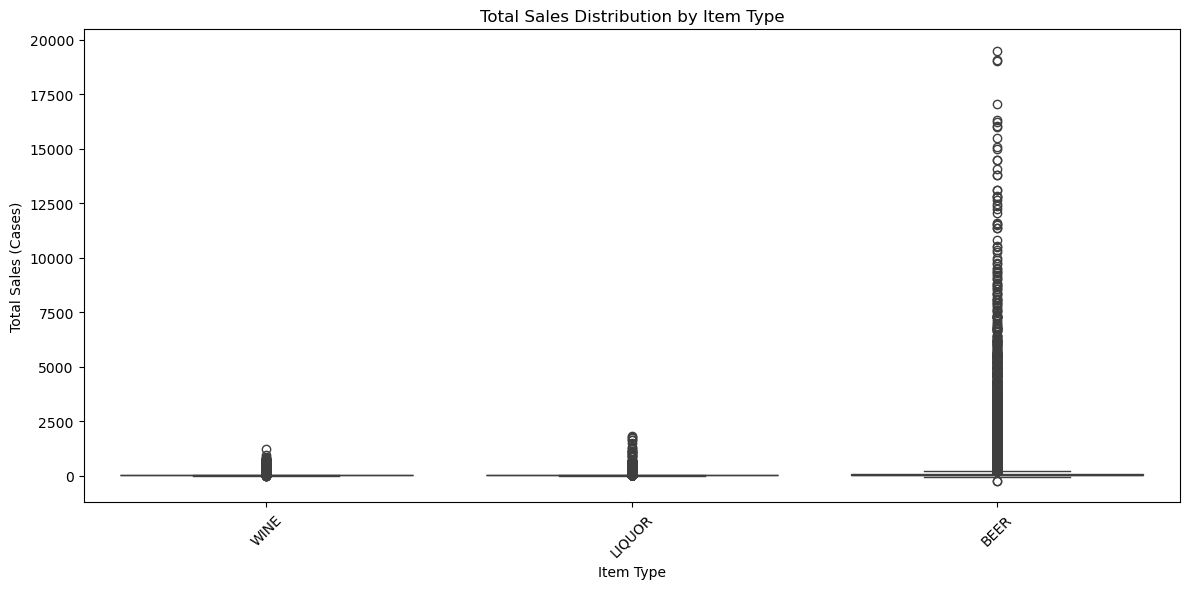

In [34]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_alcohol, x='ITEM TYPE', y='TOTAL SALES')

plt.title('Total Sales Distribution by Item Type')
plt.xlabel('Item Type')
plt.ylabel('Total Sales (Cases)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()